4.10 Part 2

This script includes

#1. Import Libraries and Data

#2. Create Profiling Variables

2.1 Dependents Group

2.2 Customer Profile - Variable

#3. Visualization for Customer Profiles Distributions

#4. Basic Statistics on Customer Profile level for Usage Frequency and Expenditure

#5. Comparing Customer Profiles with Regions and Departments

5.1 Customer profiles by region

5.2 Age Groups by Region

5.3 Income Groups by Region

5.4 Number of Dependents Groups by Region

#6. Top Departments

#7. Export Charts

#8. Export Data

1. Import Libraries and Data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# importing department df
df_dep=pd.read_csv(r"C:\Users\Owner\Downloads\4.4_departments\departments.csv")

In [5]:
# import df from 4.10 pt 1 
df_ords_prods_customers_merge_pt_one_with_exclusion =pd.read_pickle(r"C:\Users\Owner\Downloads\df_ords_prods_customers_merge_pt_one_with_exclusion.pkl")

In [6]:
import pandas as pd

# Dictionary mapping department_id to department names
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverags',
    8: 'pets',
    9: 'dry goods pasta',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
    }

# Create a new column 'department' using the map() function
df_ords_prods_customers_merge_pt_one_with_exclusion['department'] = df_ords_prods_customers_merge_pt_one_with_exclusion['department_id'].map(department_mapping).fillna(df_ords_prods_customers_merge_pt_one_with_exclusion['department_id'])


In [7]:
df_ords_prods_customers_merge_pt_one_with_exclusion.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,gender,state,date_joined,n_dependants,marital_status,income_group,age_group,region,activity_level,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Male,Minnesota,8/1/2019,1,married,Low_income,Senior,Midwest,High-activity customer,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Male,Minnesota,8/1/2019,1,married,Low_income,Senior,Midwest,High-activity customer,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Female,Vermont,6/16/2018,2,married,High_income,Senior,Northeast,High-activity customer,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Female,Hawaii,1/4/2019,2,married,Middle_income,Older adult,West,High-activity customer,snacks
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,Male,District of Columbia,5/8/2019,3,living with parents and siblings,Low_income,Young adult,South,High-activity customer,snacks


2. Create Profiling Variables

Demographic Variables:

- Dependents: Has dependents, No dependents
- Income Groups: high, middle, low (created in 4.10 pt 1)
- Age Groups: young_adult, adult, older_adult, senior (created in 4.10 pt 1)
- Family Status: single, married, divorced/widowed, living with parents and siblings

All possible customer profiles w/o age groups and income groups:
- Single with No Dependents
- Single with Dependents
- Married Adult with No Dependents
- Married Adult with Dependents
- Divorced/widowed with No Dependents
- Divorced/Widowed with Dependents
- Living with parents/siblings with No Dependents
- Living with parents/siblings with Dependents

2.1 Dependents Group

In [12]:
# Define get_dependents
def get_dependents(n_dependants):
    if n_dependants > 0:
        return 'Has dependents'
    else:
        return 'No dependents'
# Apply the dependents_flag function
df_ords_prods_customers_merge_pt_one_with_exclusion['dependents_flag'] = df_ords_prods_customers_merge_pt_one_with_exclusion['n_dependants'].apply(get_dependents)

In [13]:
df_ords_prods_customers_merge_pt_one_with_exclusion['dependents_flag'].value_counts()

dependents_flag
Has dependents    23245632
No dependents      7747032
Name: count, dtype: int64

2.2 Customer Profile - Variable

In [15]:
# Define the function to create profiles
def create_profile(row):
    family_status = row['marital_status']
    dependents_flag = row['dependents_flag']
    return f"{family_status}, {dependents_flag}"

# Apply the function to create a new column 'customer_profile'
df_ords_prods_customers_merge_pt_one_with_exclusion['customer_profile'] = df_ords_prods_customers_merge_pt_one_with_exclusion.apply(create_profile, axis=1)




In [16]:
df_ords_prods_customers_merge_pt_one_with_exclusion.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,date_joined,n_dependants,marital_status,income_group,age_group,region,activity_level,department,dependents_flag,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,8/1/2019,1,married,Low_income,Senior,Midwest,High-activity customer,snacks,Has dependents,"married, Has dependents"
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,8/1/2019,1,married,Low_income,Senior,Midwest,High-activity customer,snacks,Has dependents,"married, Has dependents"
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,6/16/2018,2,married,High_income,Senior,Northeast,High-activity customer,snacks,Has dependents,"married, Has dependents"
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,1/4/2019,2,married,Middle_income,Older adult,West,High-activity customer,snacks,Has dependents,"married, Has dependents"
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,5/8/2019,3,living with parents and siblings,Low_income,Young adult,South,High-activity customer,snacks,Has dependents,"living with parents and siblings, Has dependents"


In [17]:
# Creating alcohol profiling variable
df_ords_prods_customers_merge_pt_one_with_exclusion['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_ords_prods_customers_merge_pt_one_with_exclusion['department_id']]
df_ords_prods_customers_merge_pt_one_with_exclusion['alcohol_status'] = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['user_id'])['alcohol_status'].transform(np.max)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20744\3587533679.py:3: FutureWarning: The provided callable <function max at 0x00000230AD1DA340> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_ords_prods_customers_merge_pt_one_with_exclusion['alcohol_status'] = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['user_id'])['alcohol_status'].transform(np.max)


In [18]:
df_ords_prods_customers_merge_pt_one_with_exclusion['alcohol_status'].value_counts(dropna=False)

alcohol_status
0    30992664
Name: count, dtype: int64

In [19]:
#Creating pet profiling variable
#bought pet supplies(1) 
#didn't buy pet supplies (0)
df_ords_prods_customers_merge_pt_one_with_exclusion['pet_status'] = [1 if x == 'pets' else 0 for x in df_ords_prods_customers_merge_pt_one_with_exclusion['department_id']]
df_ords_prods_customers_merge_pt_one_with_exclusion['pet_status']=df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['user_id'])['pet_status'].transform(np.max)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20744\1961549087.py:5: FutureWarning: The provided callable <function max at 0x00000230AD1DA340> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_ords_prods_customers_merge_pt_one_with_exclusion['pet_status']=df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['user_id'])['pet_status'].transform(np.max)


In [20]:
df_ords_prods_customers_merge_pt_one_with_exclusion['pet_status'].value_counts(dropna=False)

pet_status
0    30992664
Name: count, dtype: int64

In [21]:
# Creating baby department profiling variable
df_ords_prods_customers_merge_pt_one_with_exclusion['baby_status'] = [1 if x == 'babies' else 0 for x in df_ords_prods_customers_merge_pt_one_with_exclusion['department_id']]
df_ords_prods_customers_merge_pt_one_with_exclusion['baby_status'] = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['user_id'])['baby_status'].transform(np.max)

C:\Users\Owner\AppData\Local\Temp\ipykernel_20744\1584978468.py:3: FutureWarning: The provided callable <function max at 0x00000230AD1DA340> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_ords_prods_customers_merge_pt_one_with_exclusion['baby_status'] = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['user_id'])['baby_status'].transform(np.max)


In [22]:
df_ords_prods_customers_merge_pt_one_with_exclusion['baby_status'].value_counts(dropna=False)

baby_status
0    30992664
Name: count, dtype: int64

3. Visualization for Customer Profiles Distributions

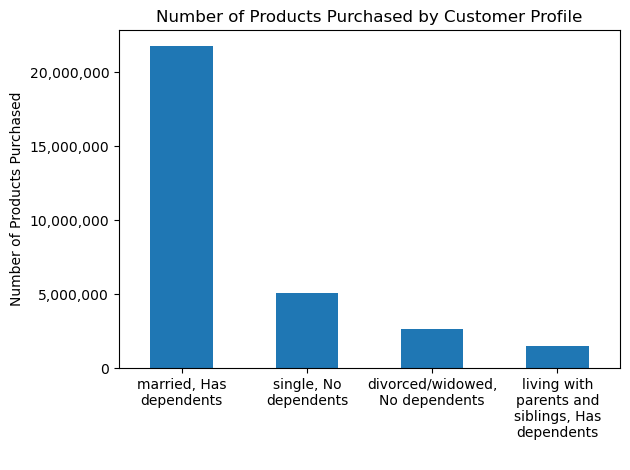

In [24]:
import textwrap
from matplotlib.ticker import FuncFormatter

# Create chart showing distribution of customers by 'customer_profile
counts = df_ords_prods_customers_merge_pt_one_with_exclusion['customer_profile'].value_counts()
ax = counts.plot.bar()

plt.title('Number of Products Purchased by Customer Profile')
plt.xlabel(' ')
plt.ylabel('Number of Products Purchased')

# Format y-axis values
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

# Wrap text labels
labels = [textwrap.fill(label, width=17) for label in counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, ha='center')
plt.tight_layout()  # Adjust layout to fit labels
bar_customer_profile = plt.gcf()

In [25]:
# Export chart
path = "../04 Analysis/Visualizations"
bar_customer_profile.savefig(os.path.join(path, 'bar_customer_profile.png'), dpi=300, bbox_inches='tight')

4. Basic Statistics on Customer Profile level for Usage Frequency and Expenditure

In [27]:
# Create 'total_expenditure' variable
df_ords_prods_customers_merge_pt_one_with_exclusion['total_expenditure'] = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby('user_id')['prices'].transform('sum')

In [28]:
# Group by 'customer_profile' and aggregate 'max_order'
usage_stats = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby('customer_profile').agg({'max_order': ['mean', 'median']}).reset_index()
# Flatten MultiIndex columns
usage_stats.columns = ['Max Order (Max)', 'Max Order (Mean)', 'Max Order (Min)']
print(usage_stats)

                                    Max Order (Max)  Max Order (Mean)  \
0                   divorced/widowed, No dependents         34.710415   
1  living with parents and siblings, Has dependents         34.854308   
2                           married, Has dependents         34.306881   
3                             single, No dependents         34.659950   

   Max Order (Min)  
0             28.0  
1             28.0  
2             28.0  
3             28.0  


In [29]:
usage_stats.to_clipboard()

5. Comparing Customer Profiles with Regions and Departments

5.1 Customer profiles by region

In [32]:
# Group by 'region' and 'customer_profile' and count occurrences
customer_profile_counts = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'customer_profile']).size().unstack(fill_value=0)

In [33]:
customer_profile_counts

customer_profile,"divorced/widowed, No dependents","living with parents and siblings, Has dependents","married, Has dependents","single, No dependents"
region,,,,
Midwest,617713,351692,5091528,1206774
Northeast,479244,256783,3857457,876584
South,878028,505905,7230205,1706324
West,672776,368231,5583831,1309589


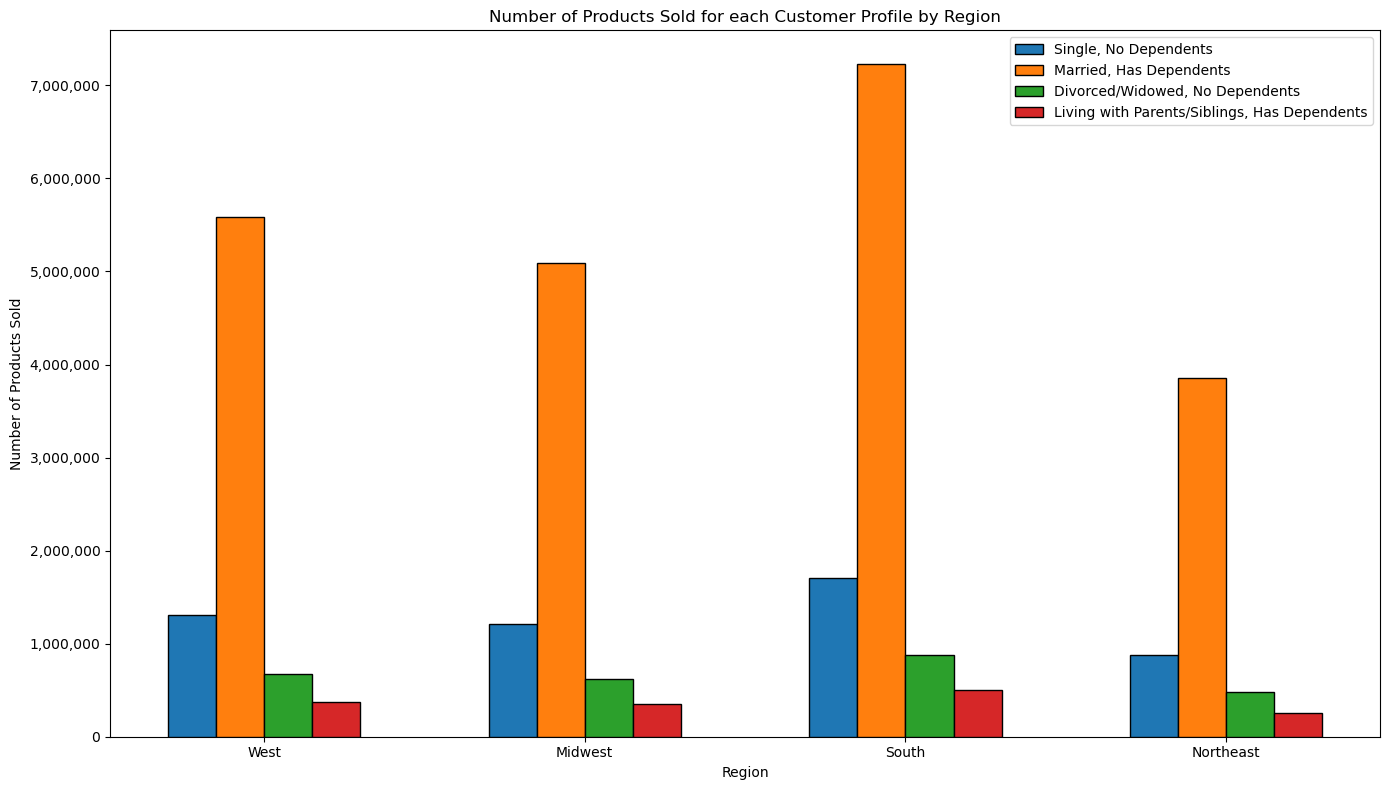

In [34]:
# Group by 'region' and 'customer_profile' and count occurrences
customer_profile_counts = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'customer_profile']).size().unstack(fill_value=0)
# Define the order of regions and customer profiles
regions = ['West', 'Midwest', 'South', 'Northeast']
customer_profiles = ['single, No dependents', 'married, Has dependents', 'divorced/widowed, No dependents', 'living with parents and siblings, Has dependents']
# Ensure customer_profile_counts has all regions and customer profiles
customer_profile_counts = customer_profile_counts.reindex(index=regions, columns=customer_profiles, fill_value=0)
# Setting the positions and width for the bars
bar_width = 0.15
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
# Plotting
plt.figure(figsize=(14, 8))
plt.bar(r1, customer_profile_counts['single, No dependents'], width=bar_width, edgecolor='black', label='Single, No Dependents', zorder=3)
plt.bar(r2, customer_profile_counts['married, Has dependents'], width=bar_width, edgecolor='black', label='Married, Has Dependents', zorder=3)
plt.bar(r3, customer_profile_counts['divorced/widowed, No dependents'], width=bar_width, edgecolor='black', label='Divorced/Widowed, No Dependents', zorder=3)
plt.bar(r4, customer_profile_counts['living with parents and siblings, Has dependents'], width=bar_width, edgecolor='black', label='Living with Parents/Siblings, Has Dependents', zorder=3)
# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold for each Customer Profile by Region')
plt.xticks([r + 1.5 * bar_width for r in range(len(regions))], regions)
# Custom y-axis formatting
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.legend()
plt.tight_layout()
customer_profile_region = plt.gcf()

In [35]:
df_ords_prods_customers_merge_pt_one_with_exclusion['customer_profile'].value_counts()

customer_profile
married, Has dependents                             21763021
single, No dependents                                5099271
divorced/widowed, No dependents                      2647761
living with parents and siblings, Has dependents     1482611
Name: count, dtype: int64

5.2 Age Groups by Region

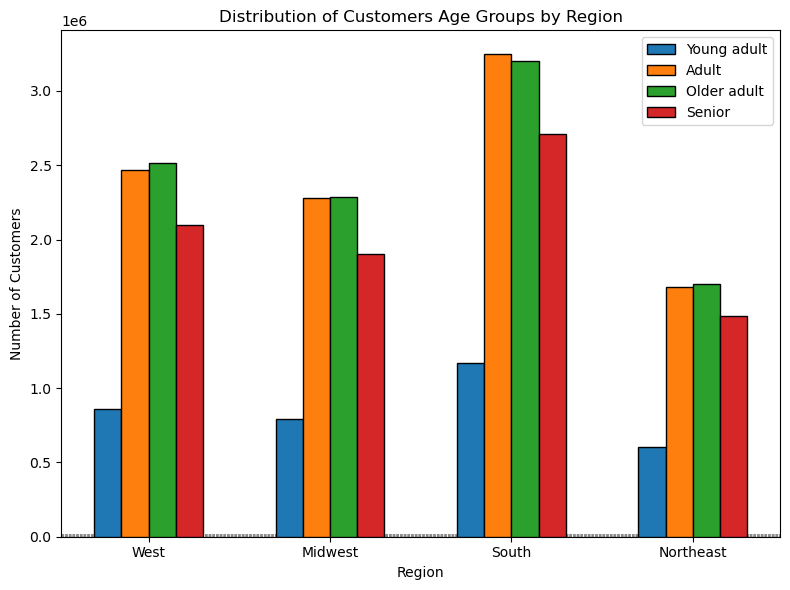

In [37]:
# Create a DataFrame age_group_counts that contains the counts of each age group for each region.\n",
age_group_counts = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'age_group']).size().unstack(fill_value=0)
regions = ['West', 'Midwest', 'South', 'Northeast']
age_groups = ['Young adult', 'Adult', 'Older adult', 'Senior']
# Ensure age_group_counts has all regions and age_groups
age_group_counts = age_group_counts.reindex(regions, axis=0).reindex(age_groups, axis=1, fill_value=0)
# Setting the positions and width for the bars
bar_width = 0.15
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
# Plotting
plt.figure(figsize=(8, 6))
y_ticks = np.arange(0, 20000, 2500)
for y in y_ticks:
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5, zorder=0)
plt.bar(r1, age_group_counts['Young adult'], width=bar_width, edgecolor='black', label='Young adult', zorder=3)
plt.bar(r2, age_group_counts['Adult'], width=bar_width, edgecolor='black', label='Adult', zorder=3)
plt.bar(r3, age_group_counts['Older adult'], width=bar_width, edgecolor='black', label='Older adult', zorder=3)
plt.bar(r4, age_group_counts['Senior'], width=bar_width, edgecolor='black', label='Senior', zorder=3)
# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Age Groups by Region')
plt.xticks([r + 1.5 * bar_width for r in range(len(regions))], regions)
plt.legend()
plt.tight_layout()
age_groups_by_region = plt.gcf()
# Display the plot
plt.show()

5.3 Income Groups by Region

region     income_group 
Midwest    High_income      3402784
           Low_income        784517
           Middle_income    3080406
Northeast  High_income      2518906
           Low_income        587850
           Middle_income    2363312
South      High_income      4667781
           Low_income       1143857
           Middle_income    4508824
West       High_income      3629948
           Low_income        849925
           Middle_income    3454554
dtype: int64
       region   income_group    count
0     Midwest    High_income  3402784
1     Midwest     Low_income   784517
2     Midwest  Middle_income  3080406
3   Northeast    High_income  2518906
4   Northeast     Low_income   587850
5   Northeast  Middle_income  2363312
6       South    High_income  4667781
7       South     Low_income  1143857
8       South  Middle_income  4508824
9        West    High_income  3629948
10       West     Low_income   849925
11       West  Middle_income  3454554
income_group  High_income  Low_incom

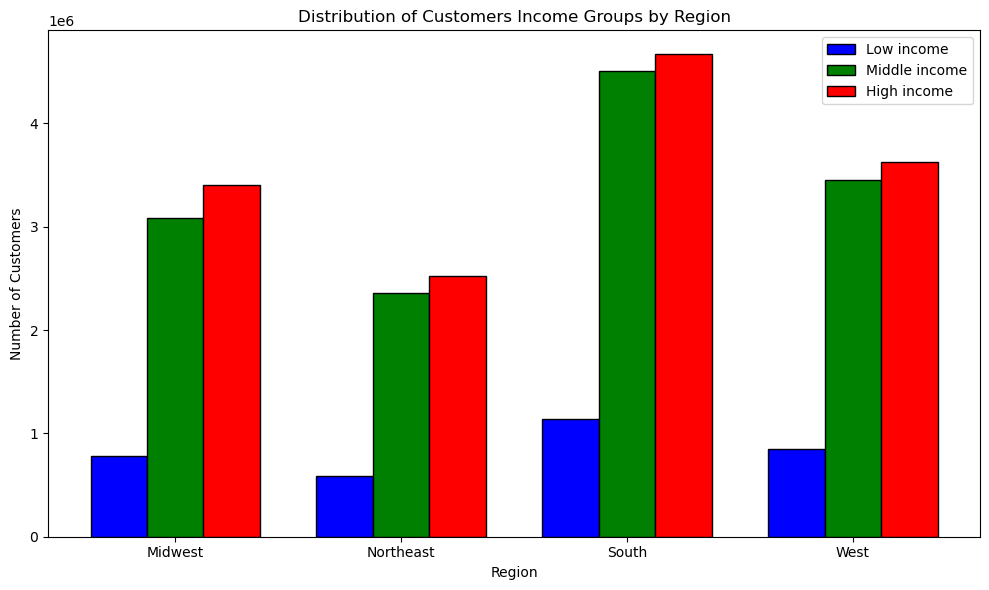

In [39]:
# Grouped data
grouped = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'income_group']).size()
print(grouped)  # Debugging: Print the grouped data

# Convert the grouped data to a DataFrame
income_group_counts = grouped.reset_index(name='count')
print(income_group_counts)  # Debugging: Print the DataFrame

# Pivot the DataFrame to get the counts for each income group by region
income_group_counts_pivot = income_group_counts.pivot(index='region', columns='income_group', values='count').fillna(0)
print(income_group_counts_pivot)  # Debugging: Print the pivoted DataFrame

# Setting the positions and width for the bars
regions = income_group_counts_pivot.index
income_groups = income_group_counts_pivot.columns
bar_width = 0.25
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, income_group_counts_pivot['Low_income'], width=bar_width, edgecolor='black', color='blue', label='Low income')
plt.bar(r2, income_group_counts_pivot['Middle_income'], width=bar_width, edgecolor='black', color='green', label='Middle income')
plt.bar(r3, income_group_counts_pivot['High_income'], width=bar_width, edgecolor='black', color='red', label='High income')
# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Income Groups by Region')
plt.xticks([r + bar_width for r in range(len(regions))], regions)
plt.legend()
plt.tight_layout()
income_group_by_region = plt.gcf()
plt.show()


5.4 Dependents Groups by Region

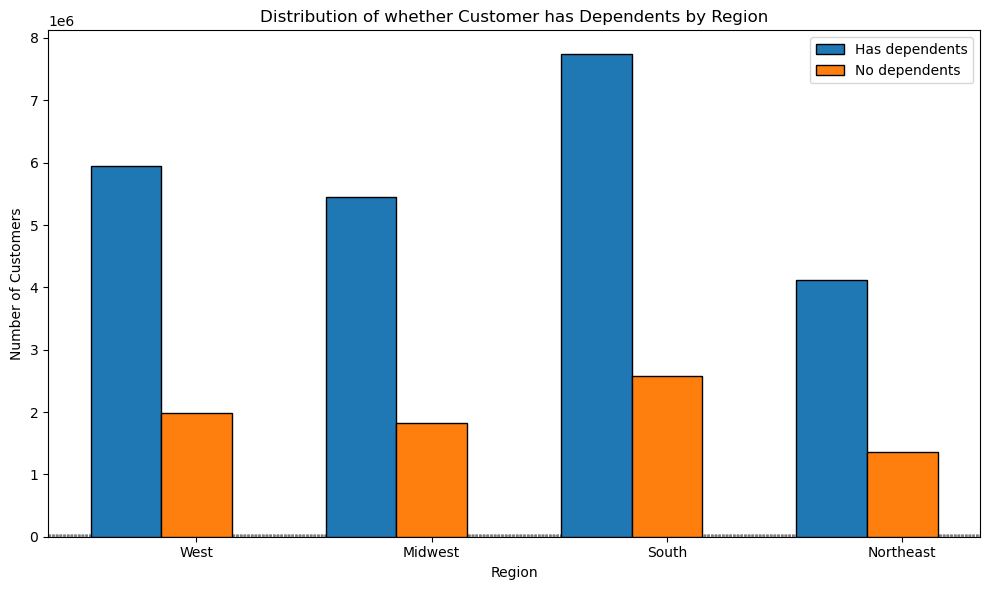

In [41]:
# Create a DataFrame income_group_counts that contains the counts of each dependents group for each region
dependents_group_counts = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby(['region', 'dependents_flag']).size().unstack(fill_value=0)
regions = ['West', 'Midwest', 'South', 'Northeast']
dependents_groups = ['Has dependents', 'No dependents']
# Ensure dependents_group_counts has all regions and dependents_groups
dependents_group_counts = dependents_group_counts.reindex(regions, axis=0).reindex(dependents_groups, axis=1, fill_value=0)
# Setting the positions and width for the bars
bar_width = 0.3
r1 = np.arange(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# Plotting
plt.figure(figsize=(10, 6))
y_ticks = np.arange(0, 45000, 5000)
for y in y_ticks:
    plt.axhline(y=y, color='grey', linestyle='--', linewidth=0.5, zorder=0)
plt.bar(r1, dependents_group_counts['Has dependents'], width=bar_width, edgecolor='black', label='Has dependents', zorder=3)
plt.bar(r2, dependents_group_counts['No dependents'], width=bar_width, edgecolor='black', label='No dependents', zorder=3)
# Adding labels
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of whether Customer has Dependents by Region')
plt.xticks([r + bar_width for r in range(len(regions))], regions)
plt.legend(loc='upper right')
plt.tight_layout()
dependents_by_region = plt.gcf()
# Display the plot
plt.show()

6. Top Departments

In [43]:
# Count the number of products sold for each department
department_sales = df_ords_prods_customers_merge_pt_one_with_exclusion.groupby('department')['product_id'].count()
# Sort the departments by the number of products sold in ascending order
department_sales_sorted = department_sales.sort_values(ascending = False)
# Limit to the top 10 departments
top_10_departments = department_sales_sorted.head(10)

In [44]:
top_10_departments

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverags           2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
Name: product_id, dtype: int64

In [45]:
# Convert to df
top_10_departments = top_10_departments.to_frame().reset_index()

In [46]:
top_10_departments

,department,product_id
0,produce,9079276
1,dairy eggs,5191828
2,snacks,2766406
3,beverags,2571934
4,frozen,2123342
5,pantry,1782903
6,bakery,1125026
7,canned goods,1012074
8,deli,1003834
9,dry goods pasta,822136


In [47]:
top_10_departments.rename(columns = {'product_id' : 'number_of_products_sold'}, inplace = True)

In [48]:
top_10_departments

,department,number_of_products_sold
0,produce,9079276
1,dairy eggs,5191828
2,snacks,2766406
3,beverags,2571934
4,frozen,2123342
5,pantry,1782903
6,bakery,1125026
7,canned goods,1012074
8,deli,1003834
9,dry goods pasta,822136


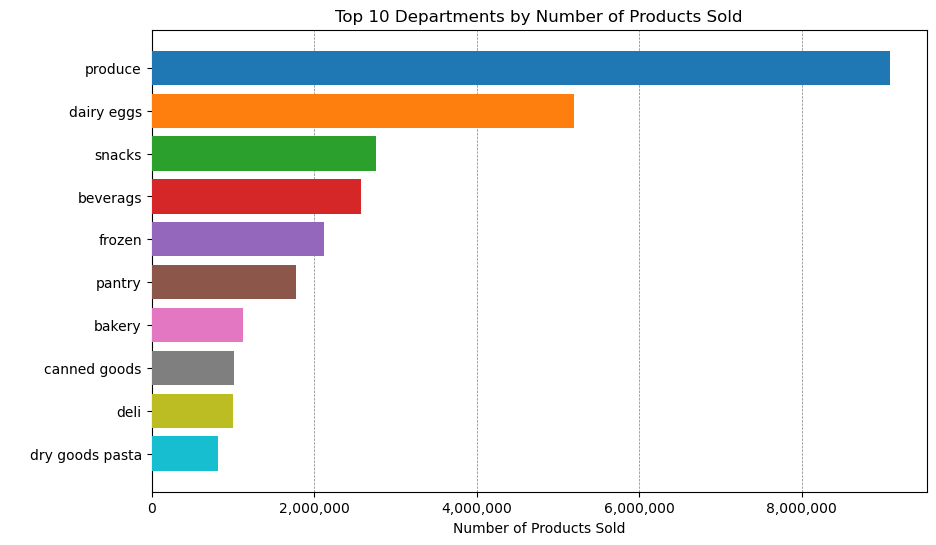

In [49]:
# Create horizontal bar chart showing the top 10 departments by number of products sold
plt.figure(figsize=(10, 6))
plt.title('Top 10 Departments by Number of Products Sold')
# Set x-ticks and add vertical grid lines
x_ticks = np.arange(0, 10000000, 2000000)
plt.xticks(x_ticks)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='grey', zorder=0)
# Define a function to format x-axis labels
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.xlabel('Number of Products Sold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.ylabel(' ')
plt.gca().invert_yaxis()  # Invert y-axis to have the department with the highest sales on top
# Plot chart
colors = plt.get_cmap('tab10')  # 'Set1' is a color map available in matplotlib
plt.barh(top_10_departments['department'], top_10_departments['number_of_products_sold'],color=colors(range(10)), zorder=3)
top_departments = plt.gcf()

 7. Export charts

In [51]:
path = "../04 Analysis/Visualizations"
top_departments.savefig(os.path.join(path,'top_departments.png'), dpi=300, bbox_inches='tight')
dependents_by_region.savefig(os.path.join(path,'dependents_by_region.png'), dpi=300, bbox_inches='tight')
income_group_by_region.savefig(os.path.join(path,'income_group_by_region.png'), dpi=300, bbox_inches='tight')
age_groups_by_region.savefig(os.path.join(path, 'age_groups_by_region.png'), dpi=300, bbox_inches='tight')
customer_profile_region.savefig(os.path.join(path,'customer_profile_region.png'), dpi=300, bbox_inches='tight')

8. Export data

In [53]:
# Export data
path = "../02 Data/Prepared Data"
df_ords_prods_customers_merge_pt_one_with_exclusion.to_pickle(os.path.join(path, 'df_ords_prods_customers_merge_pt_one_with_exclusion.pkl'))